# Adesso adaptado no Colab

## Vídeos antigos
* [Adesso1-mm-1-7 (86min)](https://www.loom.com/share/92fbb710f02646c59d45c4e8fcfbc469) após 33 min

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2, requests, sys
import numpy as np

In [2]:
# download _morph.py from drive
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1FlMtAkb0npwmD54aCysLsxB84PehcKMe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1FlMtAkb0npwmD54aCysLsxB84PehcKMe
From (redirected): https://drive.google.com/uc?id=1FlMtAkb0npwmD54aCysLsxB84PehcKMe&confirm=t&uuid=6690b086-bcc3-48fa-8cff-48b56e2d7fe2
To: /content/_morph.py
100% 39.2k/39.2k [00:00<00:00, 49.5MB/s]


In [3]:
from _morph import *
help(mm.cdil)

Help on function cdil in module _morph:

cdil(f, g, b=array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8), n=1)
    This fuction will be dilate g with minimum f, n times
    input: 
      - f: input image
      - g: mark image
      - b: neighbors
      - n: number of iterations
    output:
      - y: result of condictional dilations



# mmcdil

Dilatação condicional

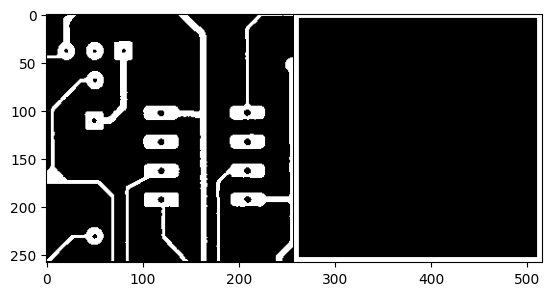

In [4]:
img = mm.read('https://drive.google.com/file/d/1PJxFIpvmKo5IlGxtO3WPdD49dcSTMsNY/view?usp=sharing')
g = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY) # converte para grayscale
ret, g = cv2.threshold(g, 125, 255, cv2.THRESH_BINARY)
f = np.ones_like(g)*255
borda = 5
f[borda:-borda,borda:-borda] = 0
mm.show(cv2.hconcat((g, f)))  

### Equação:

$$(f \oplus_{g} b)^n = \underbrace{((((f \wedge g)\oplus_g b ) \oplus_g b ) \cdots \oplus_g b )}_{n}$$

$$(f \oplus_{g} b)^0 = f \wedge g$$

$$(f \oplus_{g} b)^1 = ((f \oplus_{g} b)^0 \oplus b) \wedge g$$

$$(f \oplus_{g} b)^n = ((f \oplus_{g} b)^{n-1} \oplus b )\wedge g, n>1$$



### Algoritmo em Matlab:

```
function y=mmcdil_equ(f,g,b,n)
  y = mmintersec(f,g);
  for i=1:n
    dil = mmdil(y,b);
    y = mmintersec(dil,g);
  end
```


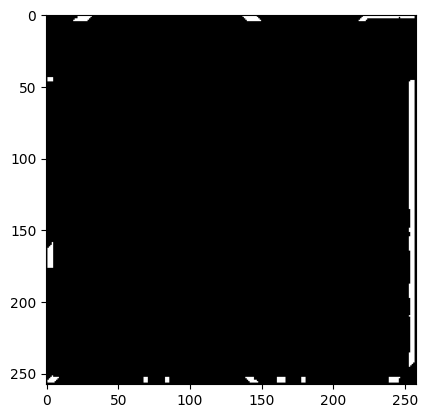

In [5]:
mm.show(np.minimum(f,g))

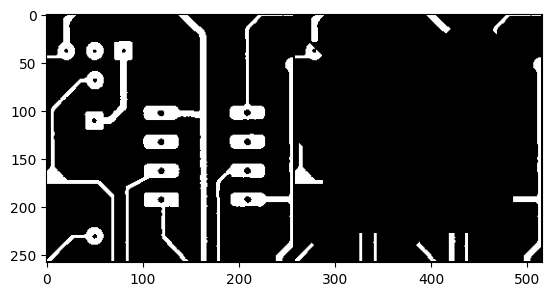

In [6]:
import numpy
b = mm.secross()
r = mm.cdil(f,g,b,25) 
mm.show(cv2.hconcat((g, r))) 

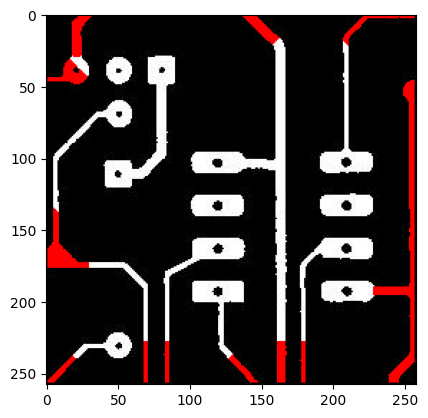

In [7]:
mm.show(img,r)